In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [50]:
#me traigo el dataset de entrenamiento

diamonds= pd.read_csv('./data/diamonds_train_sab_2.csv')

diamonds.head()

,Index_ID,Clarity,Color,Cut,Depth,x,y,z,Table,Price,City,Carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,VS2,J,Premium,62.4,6.83,6.79,4.25,58.0,4268,Dubai,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,VS2,H,Very Good,63.0,4.35,4.38,2.75,57.0,505,Kimberly,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,VS1,G,Fair,65.5,5.62,5.53,3.65,55.0,2686,Las Vegas,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,SI1,D,Good,63.8,4.68,4.72,3.00,56.0,738,Kimberly,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,SI1,G,Ideal,60.5,6.55,6.51,3.95,59.0,4882,Dubai,1.02


In [51]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index_ID  40455 non-null  object 
 1   Clarity   40455 non-null  object 
 2   Color     40455 non-null  object 
 3   Cut       40455 non-null  object 
 4   Depth     40455 non-null  float64
 5   x         40455 non-null  float64
 6   y         40455 non-null  float64
 7   z         40455 non-null  float64
 8   Table     40455 non-null  float64
 9   Price     40455 non-null  int64  
 10  City      40455 non-null  object 
 11  Carat     40455 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


<AxesSubplot:xlabel='Price', ylabel='City'>

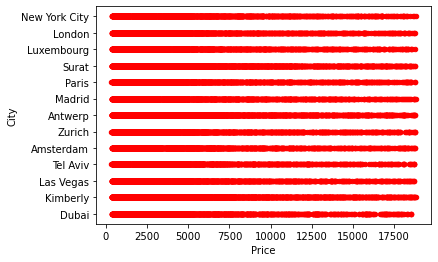

In [52]:
diamonds.plot(kind='scatter',x='Price', y='City',color='red')

In [78]:
diamonds[diamonds['xyz']!=0]

KeyError: 'xyz'

In [54]:
df = diamonds[df.score > 50]

40455

In [55]:
#x,y, z, carat están muy correlacionadas
diamonds.corr()

,Depth,x,y,z,Table,Price,Carat
Depth,1.000000,-0.026348,-0.030966,0.094655,-0.293114,-0.014864,0.026528
x,-0.026348,1.000000,0.973712,0.984876,0.196059,0.885848,0.975688
y,-0.030966,0.973712,1.000000,0.964828,0.184673,0.866163,0.951667
z,0.094655,0.984876,0.964828,1.000000,0.155189,0.874500,0.967570
Table,-0.293114,0.196059,0.184673,0.155189,1.000000,0.130111,0.183392
Price,-0.014864,0.885848,0.866163,0.874500,0.130111,1.000000,0.921935
Carat,0.026528,0.975688,0.951667,0.967570,0.183392,0.921935,1.000000


In [56]:
#como la que tiene mayor correlación con le precio es carat, me quedo con ella

In [79]:
diamonds.columns

Index(['Index_ID', 'Clarity', 'Color', 'Cut', 'Depth', 'x', 'y', 'z', 'Table',
       'Price', 'City', 'Carat'],
      dtype='object')

In [80]:
reduced= ['Carat', 'Cut','City','Color', 'Table', 'Depth' ]
diamonds_reduced= diamonds[reduced]
diamonds_reduced.head()

,Carat,Cut,City,Color,Table,Depth
0,1.21,Premium,Dubai,J,58.0,62.4
1,0.32,Very Good,Kimberly,H,57.0,63.0
2,0.71,Fair,Las Vegas,G,55.0,65.5
3,0.41,Good,Kimberly,D,56.0,63.8
4,1.02,Ideal,Dubai,G,59.0,60.5


In [59]:
X_train_original= diamonds_reduced
y= diamonds['Price']

In [64]:
X_train_dummies= pd.get_dummies(X_train_original)

scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_dummies)

X= X_train_scaled 
y= diamonds['Price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
model1 = LinearRegression()
model2 = linear_model.Lasso()
model3 = ElasticNet()
model4 = Ridge()
#mode5 = SVR()
model6 = SGDRegressor()


model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
rmse1 = mean_squared_error(y_test, y_pred1)**0.5

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
rmse2 = mean_squared_error(y_test, y_pred2)**0.5

model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
rmse3 = mean_squared_error(y_test, y_pred3)**0.5

model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
rmse4 = mean_squared_error(y_test, y_pred4)**0.5

model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
rmse6 = mean_squared_error(y_test, y_pred6)**0.5


print('rmse1 LinearRegression', rmse1)
print('rmse2 linear_model.Lasso', rmse2)
print('rmse3 ElasticNet', rmse3)
print('rmse4 Ridge', rmse4)
print('rmse6 SGDRegressor', rmse6)

rmse1 LinearRegression 1419.5501401245845
rmse2 linear_model.Lasso 1419.5243309972889
rmse3 ElasticNet 1972.618628566469
rmse4 Ridge 1419.5773823402144
rmse6 SGDRegressor 1423.0967882926916
